In [ ]:
!pip install wget

In [ ]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

### 如何使用 scikit-learn 的 DecisionTreeClassifier 模型來進行分類
我們將使用一個簡單的數據集，其中包含兩個特徵（例如，花瓣長度和花瓣寬度），並預測鳶尾花的種類（0、1 或 2）。

模型準確度：0.97


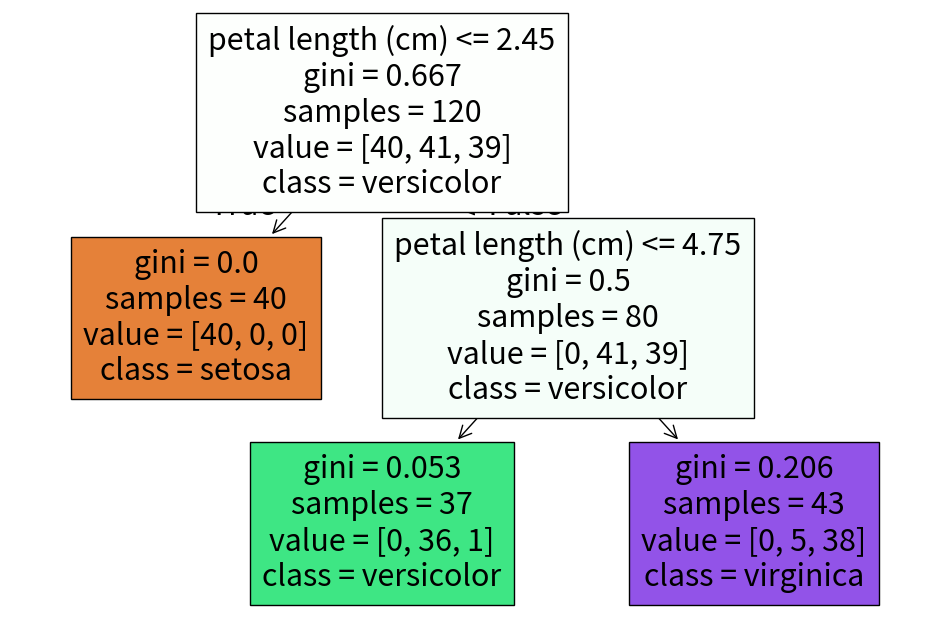

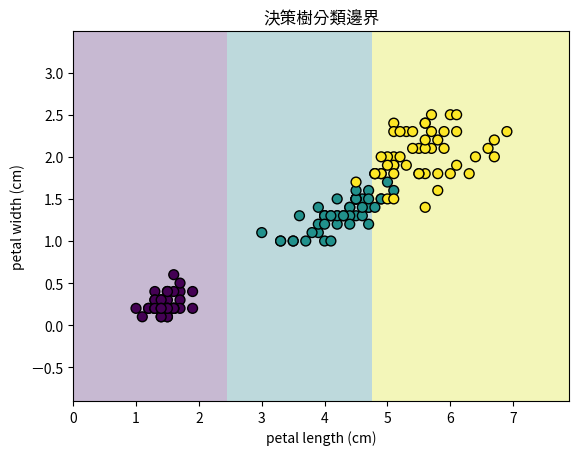

特徵重要性：[1. 0.]


In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 1. 載入數據集
iris = load_iris()
X = iris.data[:, 2:]  # 花瓣長度和花瓣寬度
y = iris.target

# 2. 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立決策樹模型
model = DecisionTreeClassifier(max_depth=2, random_state=42) #設定樹的最大深度為2

# 4. 訓練模型
model.fit(X_train, y_train)

# 5. 進行預測
y_pred = model.predict(X_test)

# 6. 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確度：{accuracy:.2f}")

# 7. 可視化決策樹
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True)
plt.show()

# 8. 可視化決策邊界 (僅適用於二維數據)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('決策樹分類邊界')
plt.show()

# 9. 取得特徵重要性
print(f"特徵重要性：{model.feature_importances_}")